In [1]:
%matplotlib inline
import torch
from sklearn.datasets import load_svmlight_file
import numpy as np


In [4]:
from random import random, seed
np.random.seed(1)
shuffle_index = np.arange(768)
np.random.shuffle(shuffle_index)

In [5]:
diabetes_features,diabetes_labels = load_svmlight_file('diabetes_scale.txt')

# convert data into tensor format
X = torch.from_numpy(diabetes_features.todense()[shuffle_index])
y = torch.from_numpy(diabetes_labels[shuffle_index])

X = X.to(torch.float32)
y = y.to(torch.float32)

X.shape, y.shape

(torch.Size([768, 8]), torch.Size([768]))

In [6]:
# get the first 500 dataset as training and the rest as testing
train_X, test_X = X[:500], X[500:]
train_y, test_y = y[:500], y[500:]



In [7]:
from collections import Counter
Counter(train_y.numpy())


Counter({1.0: 328, -1.0: 172})

## primitive perceptron

#### try to initialize w, b as 0

In [9]:
# initialize W and b as 0

w0 = torch.zeros(size=(8,), requires_grad= False)
b0 = torch.zeros(1, requires_grad= False)

w0,b0

(tensor([0., 0., 0., 0., 0., 0., 0., 0.]), tensor([0.]))

In [10]:
# define accuracy function
def accuracy(X, y, w, b):
    acc_num = 0
    for i in range(X.shape[0]):
        temp = torch.dot(X[i] , w) + b
        if torch.sign(temp) == y[i]:
            acc_num = acc_num + 1

    return acc_num/X.shape[0]


In [11]:
# accuracy of parameters as 0
accuracy(train_X, train_y, w0, b0)

0.0

In [12]:
# define primitive perceptron
def primitive(X,y,w,b):
    for i in range(X.shape[0]):
        if (y[i] * (torch.dot(X[i] , w)) + b) <= 0 :
            w = w + y[i] * X[i]
            b = b + y[i] 
        else:
            continue
    return w,b

In [13]:
# W,b after one round update
w0, b0 = primitive(train_X, train_y, w0, b0)
w0, b0

(tensor([-1.5882, -2.0553,  0.4918, -0.2727,  0.5319, -0.6185, -0.2784, -0.5667]),
 tensor([3.]))

In [14]:
# train and test accuracy of primitive model with parameters initialized as 0
print(f'training accuracy: {accuracy(train_X, train_y, w0, b0)}, test accuracy: {accuracy(test_X, test_y, w0, b0)}')

training accuracy: 0.658, test accuracy: 0.6417910447761194


#### initialize w, b as random number(normal distribution)

In [16]:
# initialize W and b as normal distributed
torch.manual_seed(0)

w = torch.normal(0, 0.01, size = (8,), requires_grad= False)
b = torch.normal(0, 0.01, size = (1,), requires_grad= False)
w,b

(tensor([ 0.0154, -0.0029, -0.0218,  0.0057, -0.0108, -0.0140,  0.0040,  0.0084]),
 tensor([-0.0072]))

In [17]:
# accuracy before training
accuracy(train_X, train_y, w, b)

0.368

In [18]:
# w,b after one round training
w2, b2 = primitive(train_X, train_y, w, b)
w2, b2

(tensor([-1.0434, -2.4552,  0.7979, -0.1761,  0.3603, -1.6265,  0.4891, -1.2916]),
 tensor([1.9928]))

In [19]:
# train and test accuracy of primitive model with parameters initialized as random number(normal distributed)
print(f'training accuracy: {accuracy(train_X, train_y, w2, b2)}, test accuracy: {accuracy(test_X, test_y, w2, b2)}')


training accuracy: 0.682, test accuracy: 0.664179104477612


In [20]:
# run 10 epochs

train_acc_list =[]
test_acc_list =[]
w_list = []
b_list = []

for i in range(10):
    w, b = primitive(train_X, train_y, w, b)
    w_list.append(w)
    b_list.append(b)

    tem_train_acc = accuracy(train_X, train_y, w, b)
    tem_test_acc = accuracy(test_X, test_y, w, b)
    train_acc_list.append(tem_train_acc)
    test_acc_list.append(tem_test_acc)


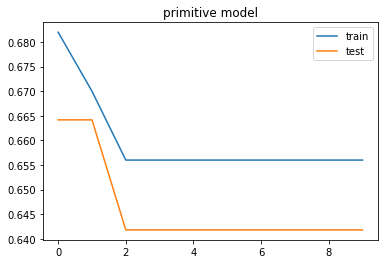

In [21]:
from cProfile import label
import matplotlib.pyplot as plt

plt.plot(range(10), train_acc_list, label="train")
plt.plot(range(10), test_acc_list, label = "test")
plt.legend()
plt.title("primitive model")
plt.show()

In [22]:
max_test_value = max(test_acc_list)
max_index = test_acc_list.index(max_test_value)
best_W = w_list[max_index]
best_b = b_list[max_index]

max_test_value, best_W, best_b

(0.664179104477612,
 tensor([-1.0434, -2.4552,  0.7979, -0.1761,  0.3603, -1.6265,  0.4891, -1.2916]),
 tensor([1.9928]))

# compare with sklearn perceptron model

In [23]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train_X, train_y)
Perceptron()
clf.score(train_X, train_y)


0.7

In [25]:
clf.score(test_X, test_y)

0.6865671641791045

In [26]:
Counter(clf.predict(train_X))

Counter({-1.0: 256, 1.0: 244})